# **Semantic Model Diagrams**

In [ ]:
## Run at your Fabric / Power BI service workspace and update semantic model names accordingly

# Libraries import
import matplotlib.pyplot as plt
from sempy.relationships import plot_relationship_metadata

# If fetching relationships from a Power BI/Fabric model:
import sempy.fabric as fabric

#For graph amd image generation
import graphviz
from PIL import Image
Image.MAX_IMAGE_PIXELS = None 

import os
import html

StatementMeta(, 084f25c4-f51c-4438-b790-52d4ea562cc8, 3, Finished, Available, Finished)

# **Inventory Analytics**

StatementMeta(, 65cf87bb-c507-4039-8247-31ede8a0788e, 23, Finished, Available, Finished)

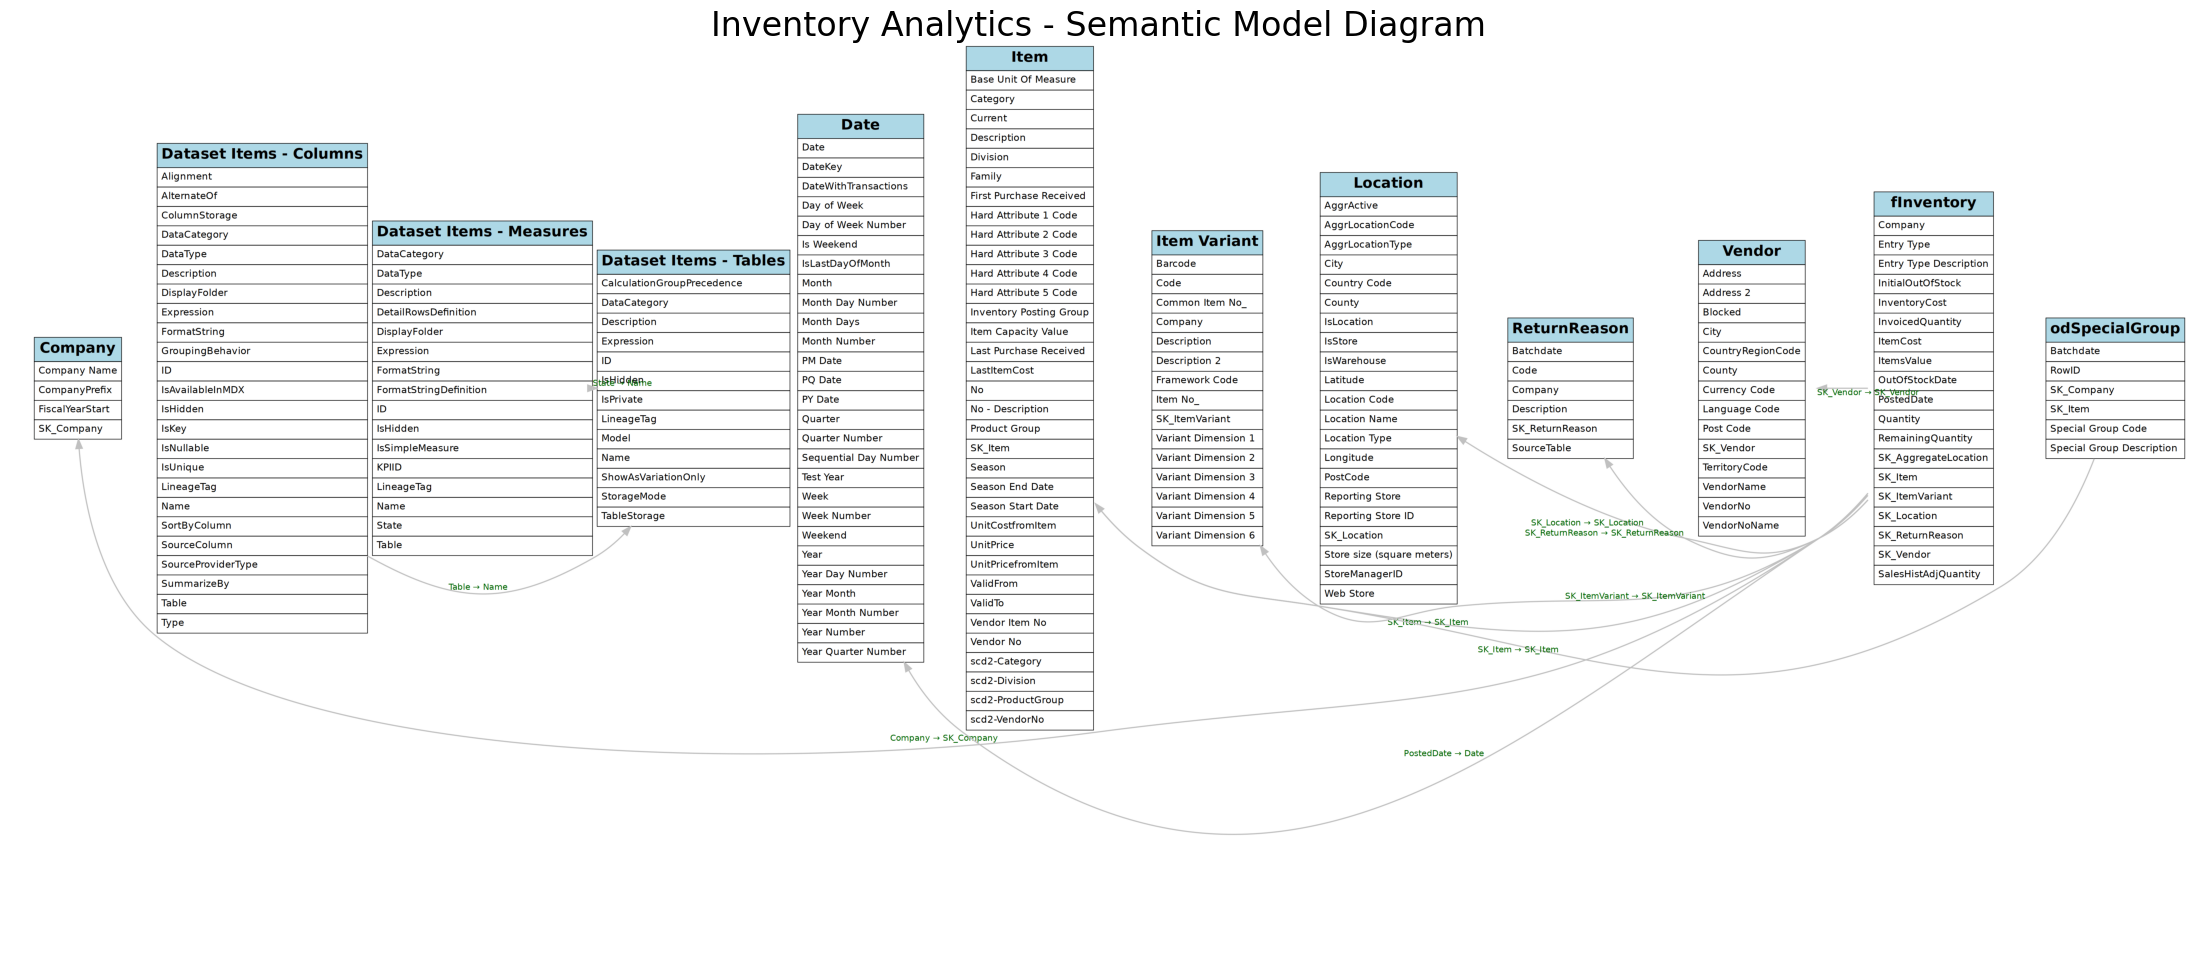

✅ Image saved: /mnt/var/hadoop/tmp/nm-secondary-local-dir/usercache/trusted-service-user/appcache/application_1750770701655_0001/container_1750770701655_0001_01_000001/relationship_graph_horizontal_manual.png


In [21]:


# Step 1: Get relationships
relationships = fabric.list_relationships("Inventory Analytics")

# Step 2: Get all tables involved
all_tables = sorted(set(relationships['From Table']).union(set(relationships['To Table'])))

# Step 3: Get all columns per table
tables = {}
for table in all_tables:
    try:
        cols = fabric.list_columns("Inventory Analytics", table)
        tables[table] = sorted(cols['Column Name'])
    except Exception as e:
        print(f"⚠️ Could not list columns for '{table}': {e}")
        tables[table] = []

# Step 4: Create graph with 'neato' engine for manual positioning
dot = graphviz.Digraph(format='png', engine='neato')

dot.attr(
    dpi='150',
    overlap='false',
    splines='true',
    fontsize='20',
    fontname='Calibri'
)
dot.attr('edge', fontname='Calibri', fontsize='16', color='gray')

# Helper to create HTML label for each table node with bigger fonts
def make_html_label(table, columns):
    label = f"""<
    <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="6">
        <TR><TD BGCOLOR="lightblue" ALIGN="CENTER"><B><FONT POINT-SIZE="24">{table}</FONT></B></TD></TR>
    """
    for col in columns:
        label += f'<TR><TD ALIGN="LEFT"><FONT POINT-SIZE="16">{col}</FONT></TD></TR>\n'
    label += "</TABLE>\n>"
    return label

# Step 5: Manually position tables spaced horizontally
x_spacing = 300  # increase for wider spacing
y_pos = 0        # all tables aligned vertically

for i, table in enumerate(all_tables):
    x = i * x_spacing
    label = make_html_label(table, tables.get(table, []))
    dot.node(
        table,
        label=label,
        shape='plaintext',
        pos=f"{x},{y_pos}!",
        width='3',
        height='2',
        margin='0',
    )

# Step 6: Add edges between tables (simple table-to-table arrows)
for _, row in relationships.iterrows():
    from_table = row['From Table']
    to_table = row['To Table']
    dot.edge(
        from_table, to_table,
        label=f"{row['From Column']} → {row['To Column']}",
        fontsize='14',
        fontcolor='darkgreen',
        penwidth='2',
        arrowsize='1.5'
    )

# Step 7: Render and save
output_file = "relationship_graph_horizontal_manual"
rendered_path = dot.render(output_file, cleanup=True)

# Step 8: Display image
img = Image.open(rendered_path)
plt.figure(figsize=(40, 12))  # wide figure for horizontal layout
plt.imshow(img)
plt.axis('off')
plt.title("Inventory Analytics - Semantic Model Diagram", fontsize=24)
plt.show()

print(f"✅ Image saved: {os.path.abspath(rendered_path)}")


StatementMeta(, 65cf87bb-c507-4039-8247-31ede8a0788e, 58, Finished, Available, Finished)

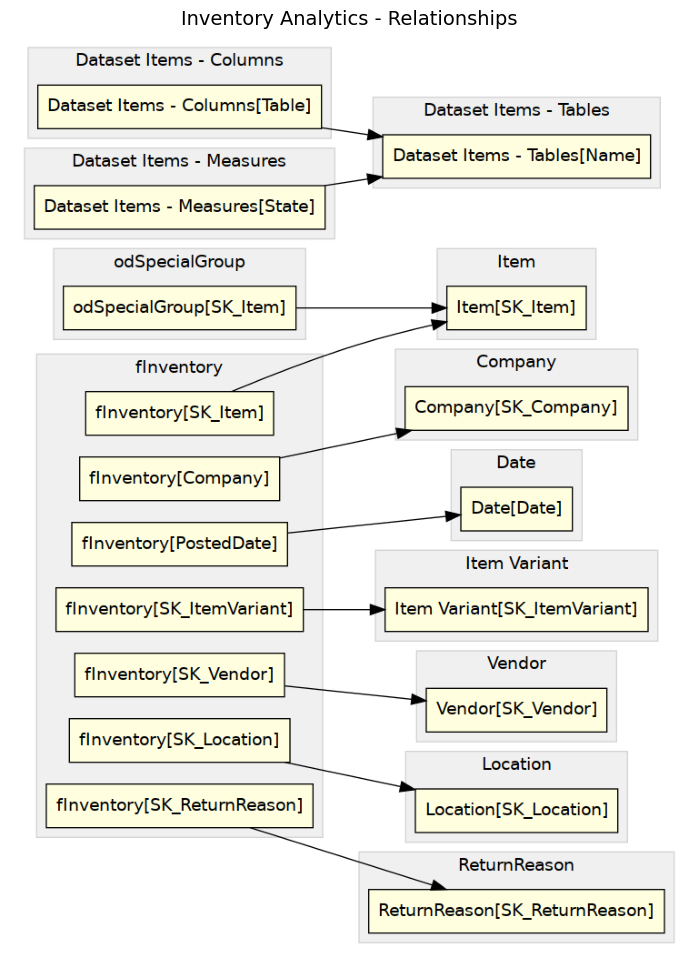

In [56]:

# Step 1: Get relationships from Fabric model
relationships = fabric.list_relationships("Inventory Analytics")

# Step 2: Create the main directed graph
dot = graphviz.Digraph(format='png')
dot.attr(rankdir='LR')  # Horizontal layout
dot.attr('node', shape='box', style='filled', fillcolor='lightyellow', fontname='Calibri')
dot.attr('graph', fontname='Calibri')
dot.attr('edge', fontname='Calibri')

# Step 3: Organize columns by table
tables = {}

for _, row in relationships.iterrows():
    from_table = row['From Table']
    from_col = row['From Column']
    to_table = row['To Table']
    to_col = row['To Column']

    tables.setdefault(from_table, set()).add(from_col)
    tables.setdefault(to_table, set()).add(to_col)

# Step 4: Create a subgraph (cluster) for each table
for table, columns in tables.items():
    with dot.subgraph(name=f"cluster_{table}") as sub:
        sub.attr(label=table, style='filled', color='lightgrey', fillcolor='#F0F0F0')
        for col in columns:
            node_name = f"{table}[{col}]"
            sub.node(node_name)

# Step 5: Add edges (relationships)
for _, row in relationships.iterrows():
    from_node = f"{row['From Table']}[{row['From Column']}]"
    to_node = f"{row['To Table']}[{row['To Column']}]"
    dot.edge(from_node, to_node, arrowhead='normal', arrowsize='1.2')

# Step 6: Render to file
output_file = "relationship_graph_grouped"
dot.render(output_file, cleanup=True)

# Step 7: Display the image
img = Image.open(output_file + '.png')
plt.figure(figsize=(12, 12))
plt.imshow(img)
plt.axis('off')
plt.title("Inventory Analytics - Relationships", fontsize=14)
plt.show()


# **Bookings Analytics**

StatementMeta(, 65cf87bb-c507-4039-8247-31ede8a0788e, 24, Finished, Available, Finished)

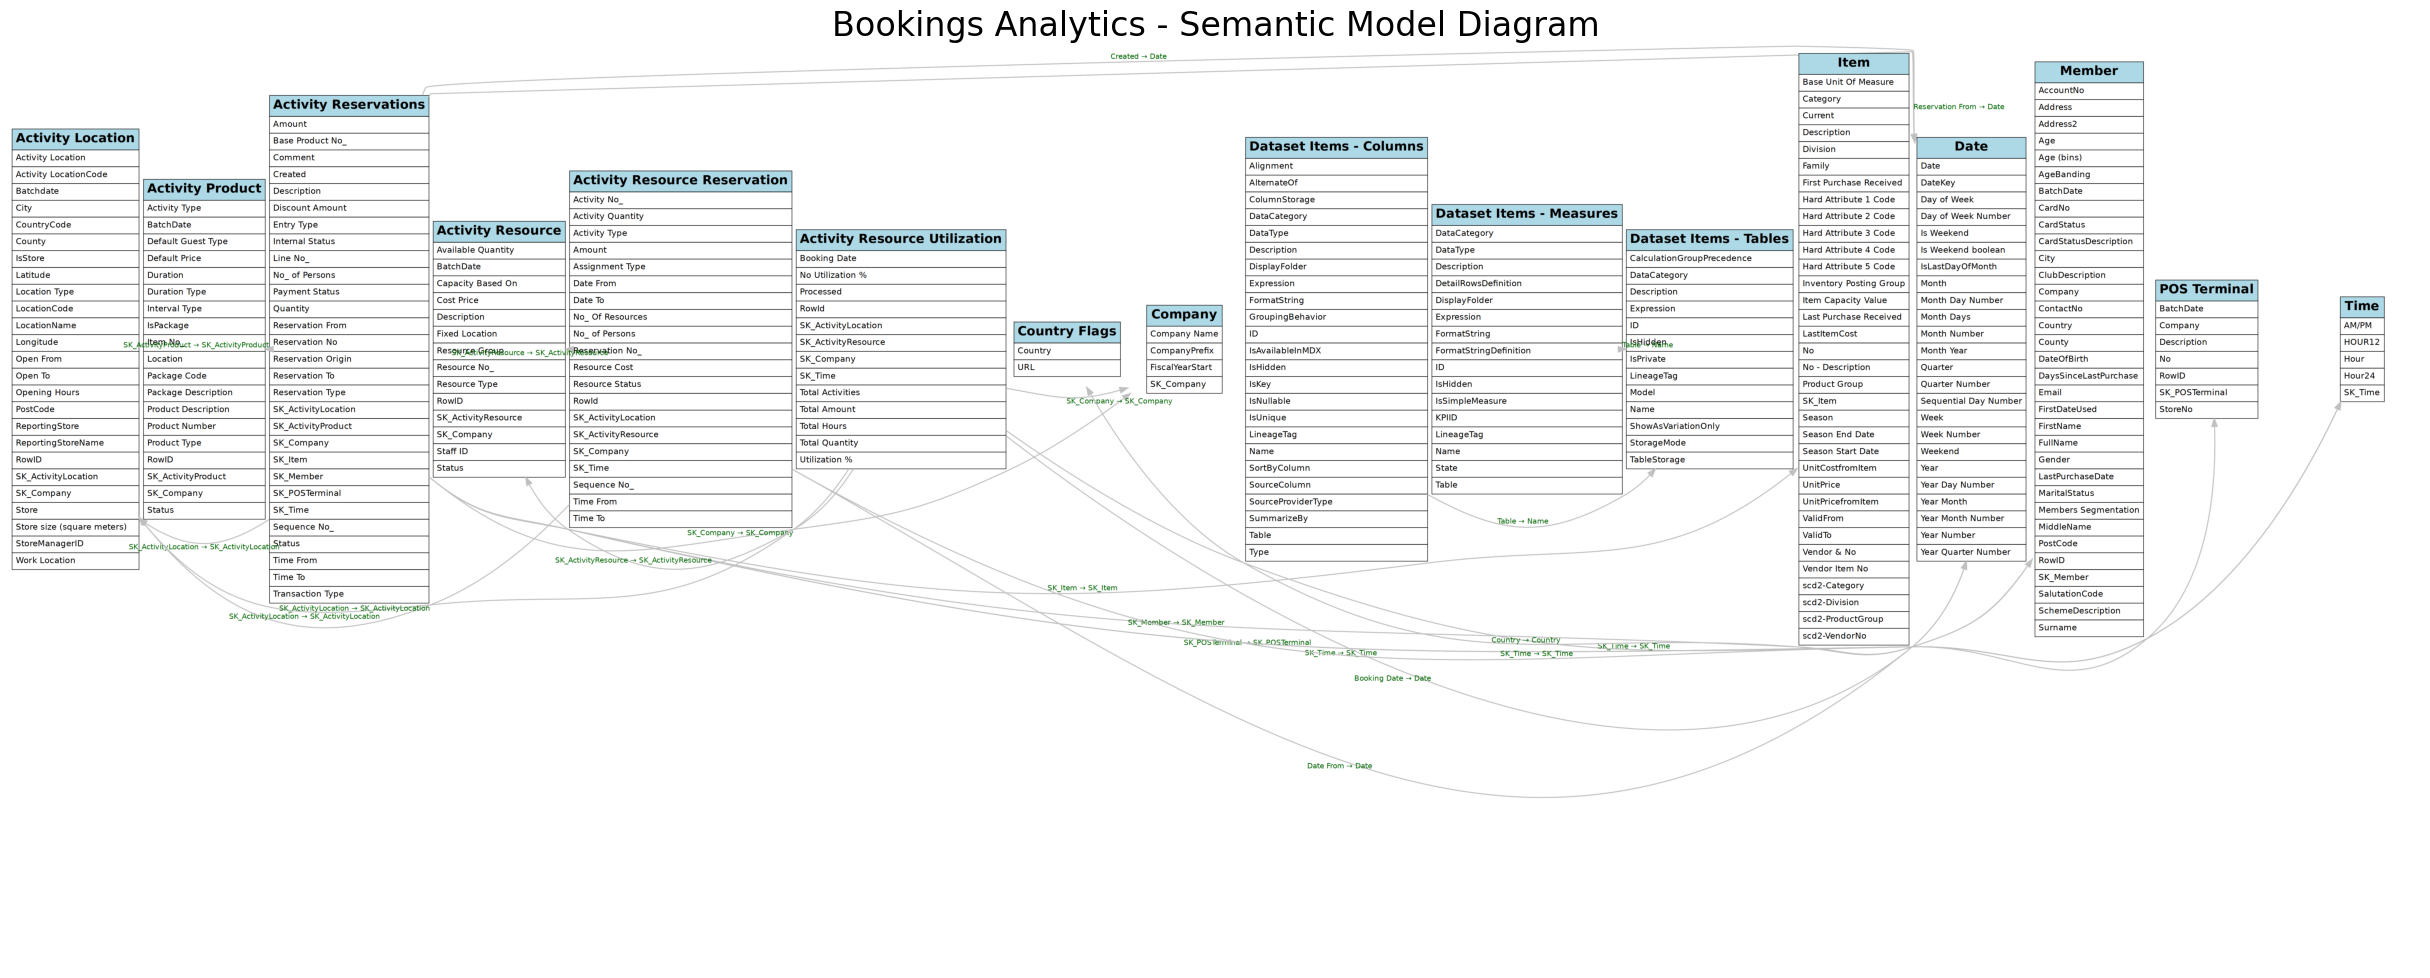

✅ Image saved: /mnt/var/hadoop/tmp/nm-secondary-local-dir/usercache/trusted-service-user/appcache/application_1750770701655_0001/container_1750770701655_0001_01_000001/relationship_graph_horizontal_manual.png


In [22]:

# Step 1: Get relationships
relationships = fabric.list_relationships("Bookings Analytics")

# Step 2: Get all tables involved
all_tables = sorted(set(relationships['From Table']).union(set(relationships['To Table'])))

# Step 3: Get all columns per table
tables = {}
for table in all_tables:
    try:
        cols = fabric.list_columns("Bookings Analytics", table)
        tables[table] = sorted(cols['Column Name'])
    except Exception as e:
        print(f"⚠️ Could not list columns for '{table}': {e}")
        tables[table] = []

# Step 4: Create graph with 'neato' engine for manual positioning
dot = graphviz.Digraph(format='png', engine='neato')

dot.attr(
    dpi='150',
    overlap='false',
    splines='true',
    fontsize='20',
    fontname='Calibri'
)
dot.attr('edge', fontname='Calibri', fontsize='16', color='gray')

# Helper to create HTML label for each table node with bigger fonts
def make_html_label(table, columns):
    label = f"""<
    <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="6">
        <TR><TD BGCOLOR="lightblue" ALIGN="CENTER"><B><FONT POINT-SIZE="24">{html.escape(table)}</FONT></B></TD></TR>
    """
    for col in columns:
        label += f'<TR><TD ALIGN="LEFT"><FONT POINT-SIZE="16">{html.escape(col)}</FONT></TD></TR>\n'
    label += "</TABLE>\n>"
    return label

# Step 5: Manually position tables spaced horizontally
x_spacing = 300  # increase for wider spacing
y_pos = 0        # all tables aligned vertically

for i, table in enumerate(all_tables):
    x = i * x_spacing
    label = make_html_label(table, tables.get(table, []))
    dot.node(
        table,
        label=label,
        shape='plaintext',
        pos=f"{x},{y_pos}!",
        width='3',
        height='2',
        margin='0',
    )

# Step 6: Add edges between tables (simple table-to-table arrows)
for _, row in relationships.iterrows():
    from_table = row['From Table']
    to_table = row['To Table']
    dot.edge(
        from_table, to_table,
        label=f"{row['From Column']} → {row['To Column']}",
        fontsize='14',
        fontcolor='darkgreen',
        penwidth='2',
        arrowsize='1.5'
    )

# Step 7: Render and save
output_file = "relationship_graph_horizontal_manual"
rendered_path = dot.render(output_file, cleanup=True)

# Step 8: Display image
img = Image.open(rendered_path)
plt.figure(figsize=(40, 12))  # wide figure for horizontal layout
plt.imshow(img)
plt.axis('off')
plt.title("Bookings Analytics - Semantic Model Diagram", fontsize=24)
plt.show()

print(f"✅ Image saved: {os.path.abspath(rendered_path)}")


StatementMeta(, 65cf87bb-c507-4039-8247-31ede8a0788e, 59, Finished, Available, Finished)

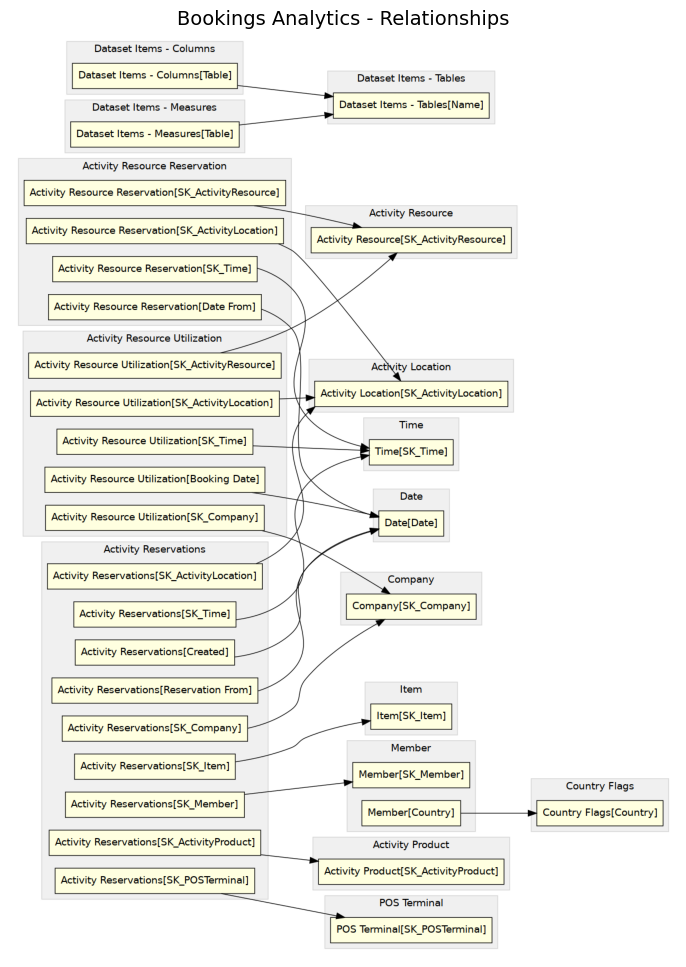

In [57]:
# Step 1: Get relationships from Fabric model
relationships = fabric.list_relationships("Bookings Analytics")

# Step 2: Create the main directed graph
dot = graphviz.Digraph(format='png')
dot.attr(rankdir='LR')  # Horizontal layout
dot.attr('node', shape='box', style='filled', fillcolor='lightyellow', fontname='Calibri')
dot.attr('graph', fontname='Calibri')
dot.attr('edge', fontname='Calibri')

# Step 3: Organize columns by table
tables = {}

for _, row in relationships.iterrows():
    from_table = row['From Table']
    from_col = row['From Column']
    to_table = row['To Table']
    to_col = row['To Column']

    tables.setdefault(from_table, set()).add(from_col)
    tables.setdefault(to_table, set()).add(to_col)

# Step 4: Create a subgraph (cluster) for each table
for table, columns in tables.items():
    with dot.subgraph(name=f"cluster_{table}") as sub:
        sub.attr(label=table, style='filled', color='lightgrey', fillcolor='#F0F0F0')
        for col in columns:
            node_name = f"{table}[{col}]"
            sub.node(node_name)

# Step 5: Add edges (relationships)
for _, row in relationships.iterrows():
    from_node = f"{row['From Table']}[{row['From Column']}]"
    to_node = f"{row['To Table']}[{row['To Column']}]"
    dot.edge(from_node, to_node, arrowhead='normal', arrowsize='1.2')

# Step 6: Render to file
output_file = "relationship_graph_grouped"
dot.render(output_file, cleanup=True)

# Step 7: Display the image
img = Image.open(output_file + '.png')
plt.figure(figsize=(12, 12))
plt.imshow(img)
plt.axis('off')
plt.title("Bookings Analytics - Relationships", fontsize=14)
plt.show()


# **Hospitality Analytics**

StatementMeta(, 65cf87bb-c507-4039-8247-31ede8a0788e, 25, Finished, Available, Finished)

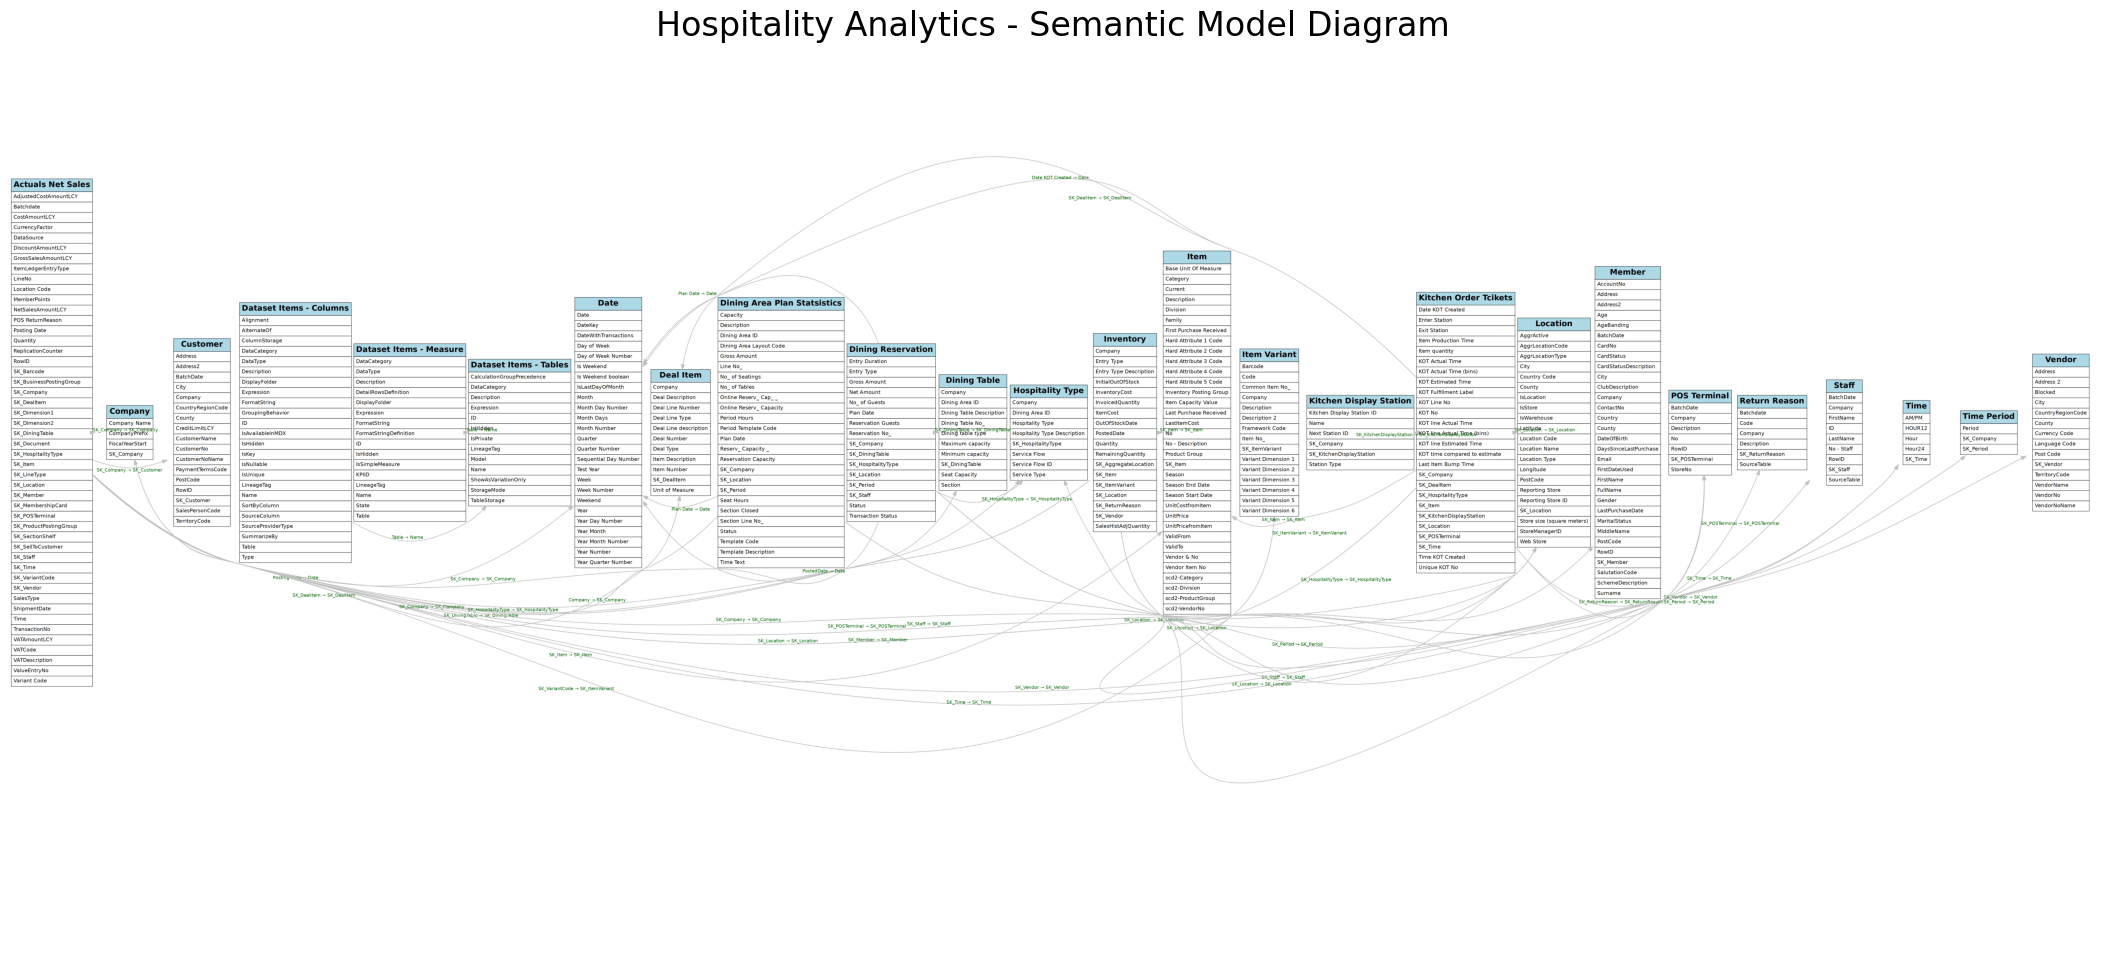

✅ Image saved: /mnt/var/hadoop/tmp/nm-secondary-local-dir/usercache/trusted-service-user/appcache/application_1750770701655_0001/container_1750770701655_0001_01_000001/relationship_graph_horizontal_manual.png


In [23]:

# Step 1: Get relationships
relationships = fabric.list_relationships("Hospitality Analytics")

# Step 2: Get all tables involved
all_tables = sorted(set(relationships['From Table']).union(set(relationships['To Table'])))

# Step 3: Get all columns per table
tables = {}
for table in all_tables:
    try:
        cols = fabric.list_columns("Hospitality Analytics", table)
        tables[table] = sorted(cols['Column Name'])
    except Exception as e:
        print(f"⚠️ Could not list columns for '{table}': {e}")
        tables[table] = []

# Step 4: Create graph with 'neato' engine for manual positioning
dot = graphviz.Digraph(format='png', engine='neato')

dot.attr(
    dpi='150',
    overlap='false',
    splines='true',
    fontsize='20',
    fontname='Calibri'
)
dot.attr('edge', fontname='Calibri', fontsize='16', color='gray')

# Helper to create HTML label for each table node with bigger fonts
def make_html_label(table, columns):
    label = f"""<
    <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="6">
        <TR><TD BGCOLOR="lightblue" ALIGN="CENTER"><B><FONT POINT-SIZE="24">{html.escape(table)}</FONT></B></TD></TR>
    """
    for col in columns:
        label += f'<TR><TD ALIGN="LEFT"><FONT POINT-SIZE="16">{html.escape(col)}</FONT></TD></TR>\n'
    label += "</TABLE>\n>"
    return label

# Step 5: Manually position tables spaced horizontally
x_spacing = 300  # increase for wider spacing
y_pos = 0        # all tables aligned vertically

for i, table in enumerate(all_tables):
    x = i * x_spacing
    label = make_html_label(table, tables.get(table, []))
    dot.node(
        table,
        label=label,
        shape='plaintext',
        pos=f"{x},{y_pos}!",
        width='3',
        height='2',
        margin='0',
    )

# Step 6: Add edges between tables (simple table-to-table arrows)
for _, row in relationships.iterrows():
    from_table = row['From Table']
    to_table = row['To Table']
    dot.edge(
        from_table, to_table,
        label=f"{row['From Column']} → {row['To Column']}",
        fontsize='14',
        fontcolor='darkgreen',
        penwidth='2',
        arrowsize='1.5'
    )

# Step 7: Render and save
output_file = "relationship_graph_horizontal_manual"
rendered_path = dot.render(output_file, cleanup=True)

# Step 8: Display image
img = Image.open(rendered_path)
plt.figure(figsize=(40, 12))  # wide figure for horizontal layout
plt.imshow(img)
plt.axis('off')
plt.title("Hospitality Analytics - Semantic Model Diagram", fontsize=24)
plt.show()

print(f"✅ Image saved: {os.path.abspath(rendered_path)}")

StatementMeta(, 65cf87bb-c507-4039-8247-31ede8a0788e, 61, Finished, Available, Finished)

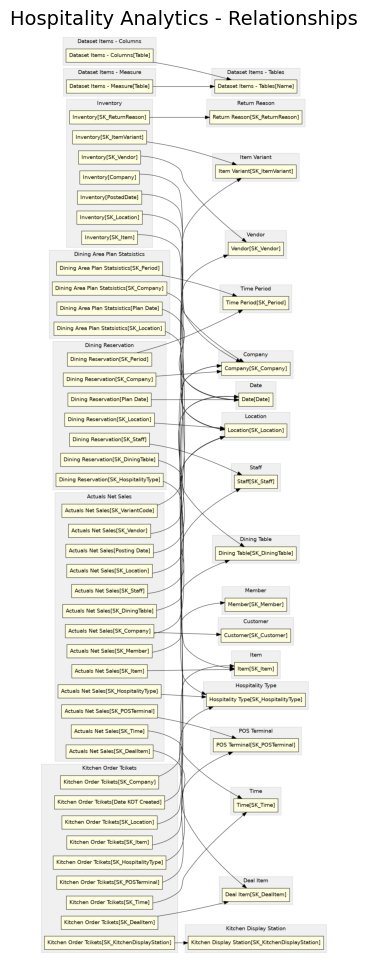

In [59]:
# Step 1: Get relationships from Fabric model
relationships = fabric.list_relationships("Hospitality Analytics")

# Step 2: Create the main directed graph
dot = graphviz.Digraph(format='png')
dot.attr(rankdir='LR')  # Horizontal layout
dot.attr('node', shape='box', style='filled', fillcolor='lightyellow', fontname='Calibri')
dot.attr('graph', fontname='Calibri')
dot.attr('edge', fontname='Calibri')

# Step 3: Organize columns by table
tables = {}

for _, row in relationships.iterrows():
    from_table = row['From Table']
    from_col = row['From Column']
    to_table = row['To Table']
    to_col = row['To Column']

    tables.setdefault(from_table, set()).add(from_col)
    tables.setdefault(to_table, set()).add(to_col)

# Step 4: Create a subgraph (cluster) for each table
for table, columns in tables.items():
    with dot.subgraph(name=f"cluster_{table}") as sub:
        sub.attr(label=table, style='filled', color='lightgrey', fillcolor='#F0F0F0')
        for col in columns:
            node_name = f"{table}[{col}]"
            sub.node(node_name)

# Step 5: Add edges (relationships)
for _, row in relationships.iterrows():
    from_node = f"{row['From Table']}[{row['From Column']}]"
    to_node = f"{row['To Table']}[{row['To Column']}]"
    dot.edge(from_node, to_node, arrowhead='normal', arrowsize='1.2')

# Step 6: Render to file
output_file = "relationship_graph_grouped"
dot.render(output_file, cleanup=True)

# Step 7: Display the image
img = Image.open(output_file + '.png')
plt.figure(figsize=(12, 12))
plt.imshow(img)
plt.axis('off')
plt.title("Hospitality Analytics - Relationships", fontsize=14)
plt.show()

# **Hotel Analytics**

StatementMeta(, 65cf87bb-c507-4039-8247-31ede8a0788e, 37, Finished, Available, Finished)

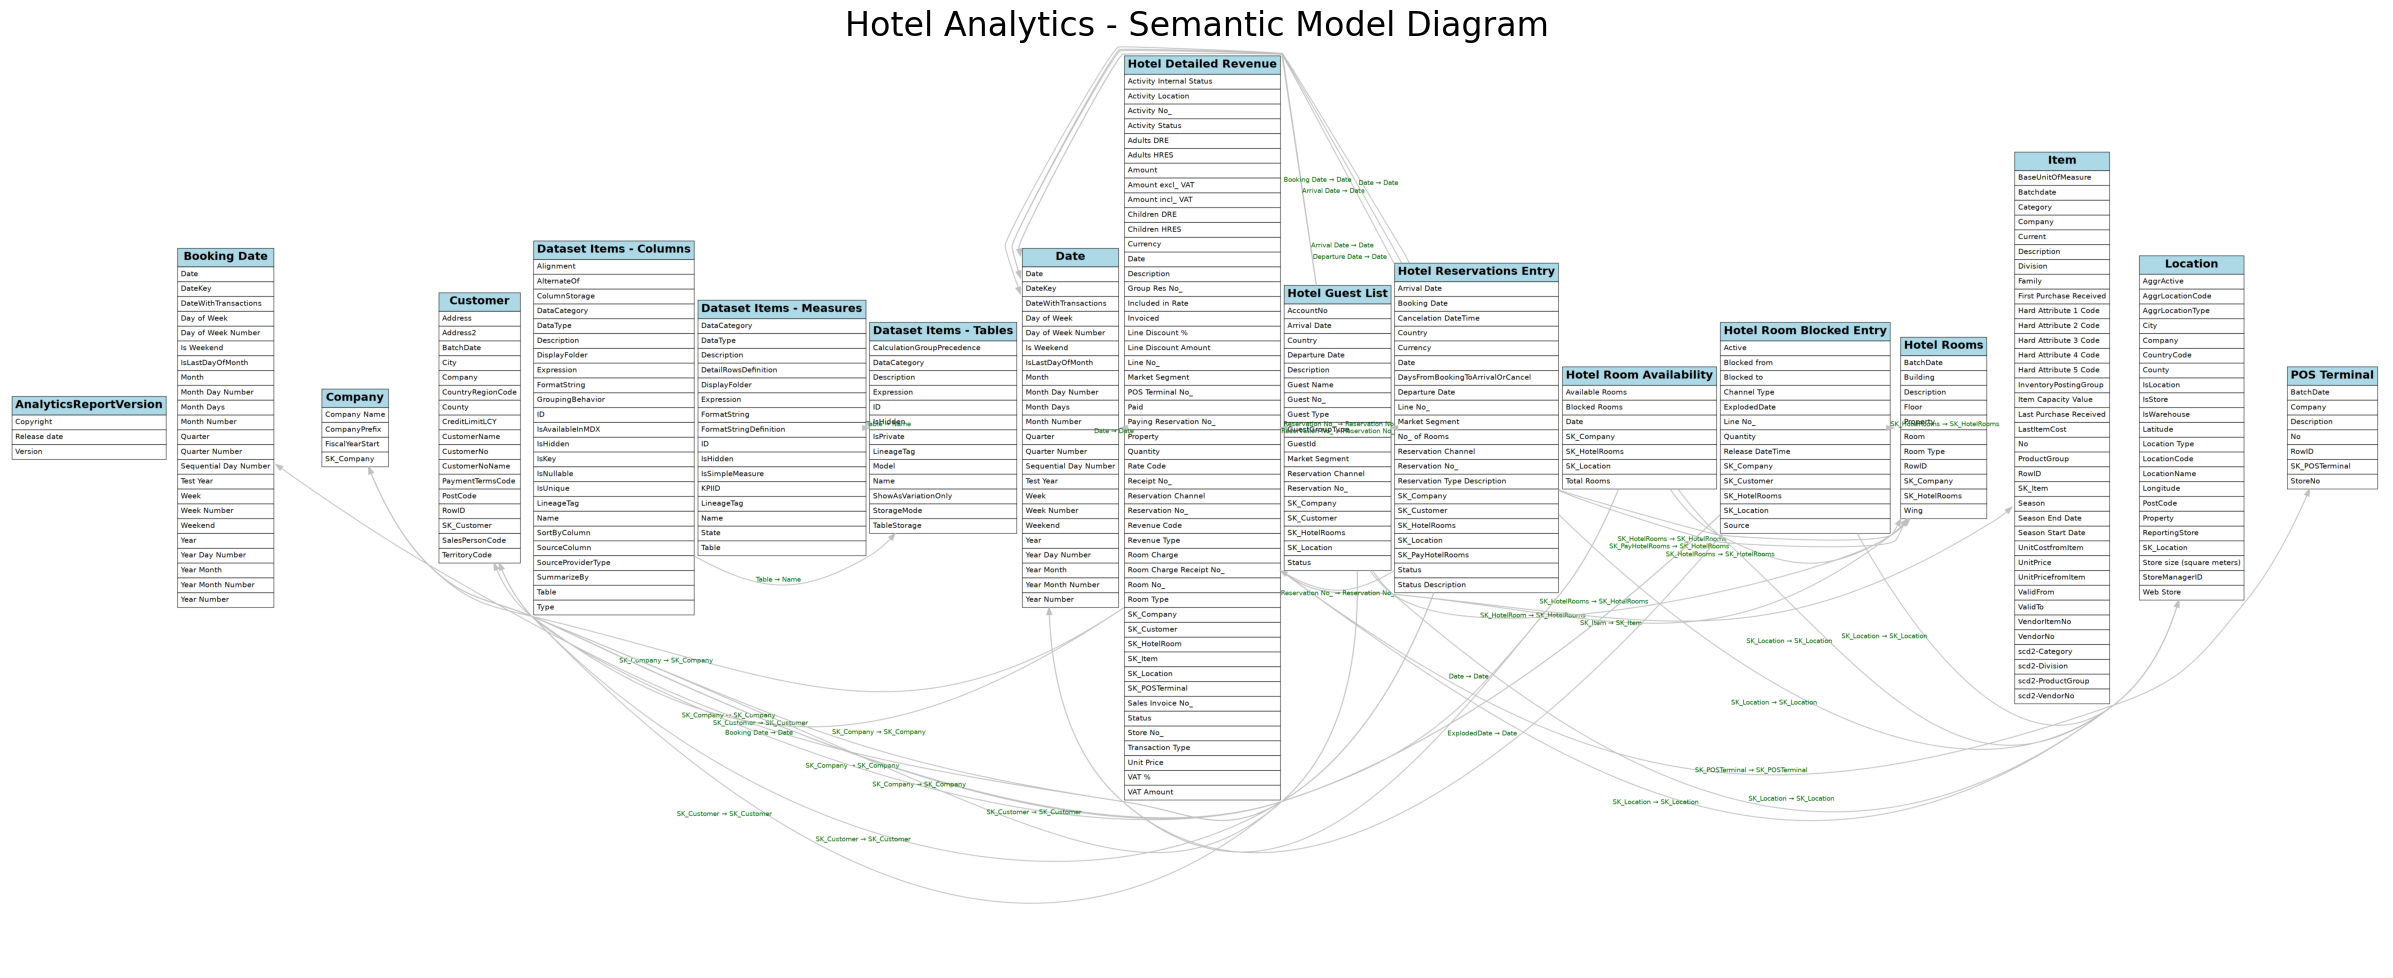

✅ Image saved: /mnt/var/hadoop/tmp/nm-secondary-local-dir/usercache/trusted-service-user/appcache/application_1750770701655_0001/container_1750770701655_0001_01_000001/relationship_graph_horizontal_manual.png


In [35]:


# Step 1: Get relationships
relationships = fabric.list_relationships("Hotel Analytics")

# Step 2: Get all tables involved and remove tables starting with "LocalDateTable..."
all_tables = sorted(set(relationships['From Table']).union(set(relationships['To Table'])))
all_tables = [table for table in all_tables if not table.startswith("LocalDateTable")]

# Step 3: Get all columns per table
tables = {}
for table in all_tables:
    try:
        cols = fabric.list_columns("Hotel Analytics", table)
        tables[table] = sorted(cols['Column Name'])
    except Exception as e:
        print(f"⚠️ Could not list columns for '{table}': {e}")
        tables[table] = []

# Step 4: Create graph with 'neato' engine for manual positioning
dot = graphviz.Digraph(format='png', engine='neato')

dot.attr(
    dpi='96',
    overlap='false',
    splines='true',
    fontsize='20',
    fontname='Calibri'
)
dot.attr('edge', fontname='Calibri', fontsize='16', color='gray')

# Helper to create HTML label for each table node with bigger fonts
def make_html_label(table, columns):
    label = f"""<
    <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="6">
        <TR><TD BGCOLOR="lightblue" ALIGN="CENTER"><B><FONT POINT-SIZE="24">{html.escape(table)}</FONT></B></TD></TR>
    """
    for col in columns:
        label += f'<TR><TD ALIGN="LEFT"><FONT POINT-SIZE="16">{html.escape(col)}</FONT></TD></TR>\n'
    label += "</TABLE>\n>"
    return label
# Step 5: Manually position tables spaced horizontally
x_spacing = 300  # increase for wider spacing
y_pos = 0        # all tables aligned vertically

for i, table in enumerate(all_tables):
    x = i * x_spacing
    label = make_html_label(table, tables.get(table, []))
    dot.node(
        table,
        label=label,
        shape='plaintext',
        pos=f"{x},{y_pos}!",
        width='3',
        height='2',
        margin='0',
    )

# Step 6: Add edges between tables (simple table-to-table arrows)
for _, row in relationships.iterrows():
    from_table = row['From Table']
    to_table = row['To Table']
    
    # Skip edges involving tables starting with "LocalDateTable..."
    if from_table.startswith("LocalDateTable") or to_table.startswith("LocalDateTable"):
        continue
    
    dot.edge(
        from_table, to_table,
        label=f"{row['From Column']} → {row['To Column']}",
        fontsize='14',
        fontcolor='darkgreen',
        penwidth='2',
        arrowsize='1.5'
    )

# Step 7: Render and save
output_file = "relationship_graph_horizontal_manual"
rendered_path = dot.render(output_file, cleanup=True)

# Step 8: Display image
img = Image.open(rendered_path)
plt.figure(figsize=(40, 12))  # wide figure for horizontal layout
plt.imshow(img)
plt.axis('off')
plt.title("Hotel Analytics - Semantic Model Diagram", fontsize=24)
plt.show()

print(f"✅ Image saved: {os.path.abspath(rendered_path)}")


StatementMeta(, 084f25c4-f51c-4438-b790-52d4ea562cc8, 4, Finished, Available, Finished)

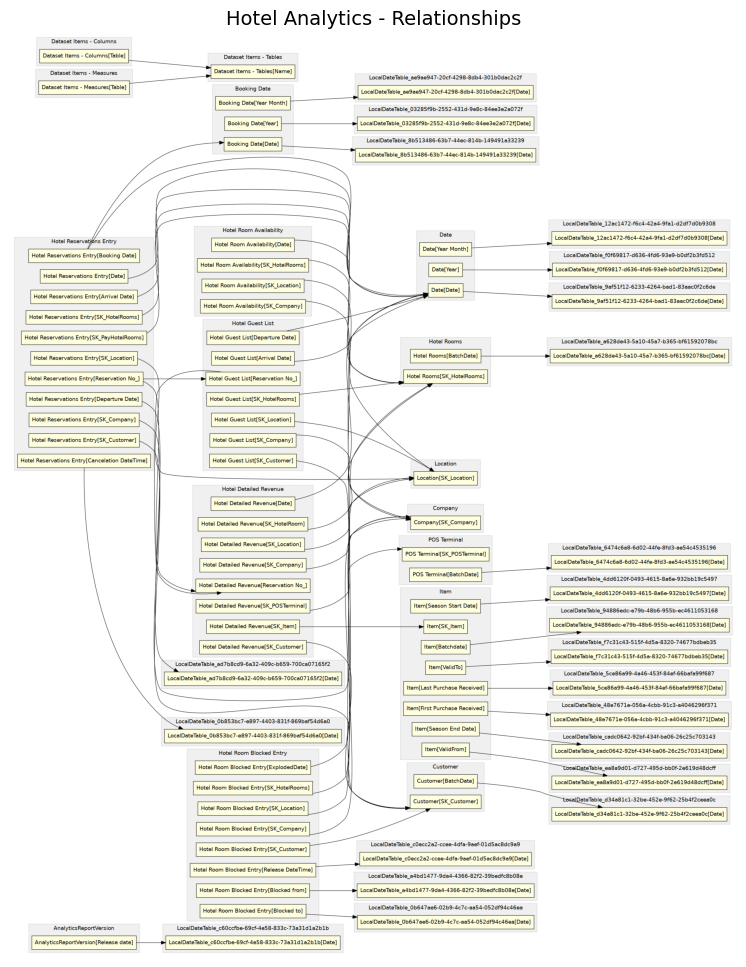

In [2]:
# Step 1: Get relationships from Fabric model
relationships = fabric.list_relationships("Hotel Analytics")

# Step 2: Create the main directed graph
dot = graphviz.Digraph(format='png')
dot.attr(rankdir='LR')  # Horizontal layout
dot.attr('node', shape='box', style='filled', fillcolor='lightyellow', fontname='Calibri')
dot.attr('graph', fontname='Calibri')
dot.attr('edge', fontname='Calibri')

# Step 3: Organize columns by table
tables = {}

for _, row in relationships.iterrows():
    from_table = row['From Table']
    from_col = row['From Column']
    to_table = row['To Table']
    to_col = row['To Column']

    tables.setdefault(from_table, set()).add(from_col)
    tables.setdefault(to_table, set()).add(to_col)

# Step 4: Create a subgraph (cluster) for each table
for table, columns in tables.items():
    with dot.subgraph(name=f"cluster_{table}") as sub:
        sub.attr(label=table, style='filled', color='lightgrey', fillcolor='#F0F0F0')
        for col in columns:
            node_name = f"{table}[{col}]"
            sub.node(node_name)

# Step 5: Add edges (relationships)
for _, row in relationships.iterrows():
    from_node = f"{row['From Table']}[{row['From Column']}]"
    to_node = f"{row['To Table']}[{row['To Column']}]"
    dot.edge(from_node, to_node, arrowhead='normal', arrowsize='1.2')

# Step 6: Render to file
output_file = "relationship_graph_grouped"
dot.render(output_file, cleanup=True)

# Step 7: Display the image
img = Image.open(output_file + '.png')
plt.figure(figsize=(12, 12))
plt.imshow(img)
plt.axis('off')
plt.title("Hotel Analytics - Relationships", fontsize=14)
plt.show()

# **Actionable Insight Analytics**

StatementMeta(, 65cf87bb-c507-4039-8247-31ede8a0788e, 36, Finished, Available, Finished)

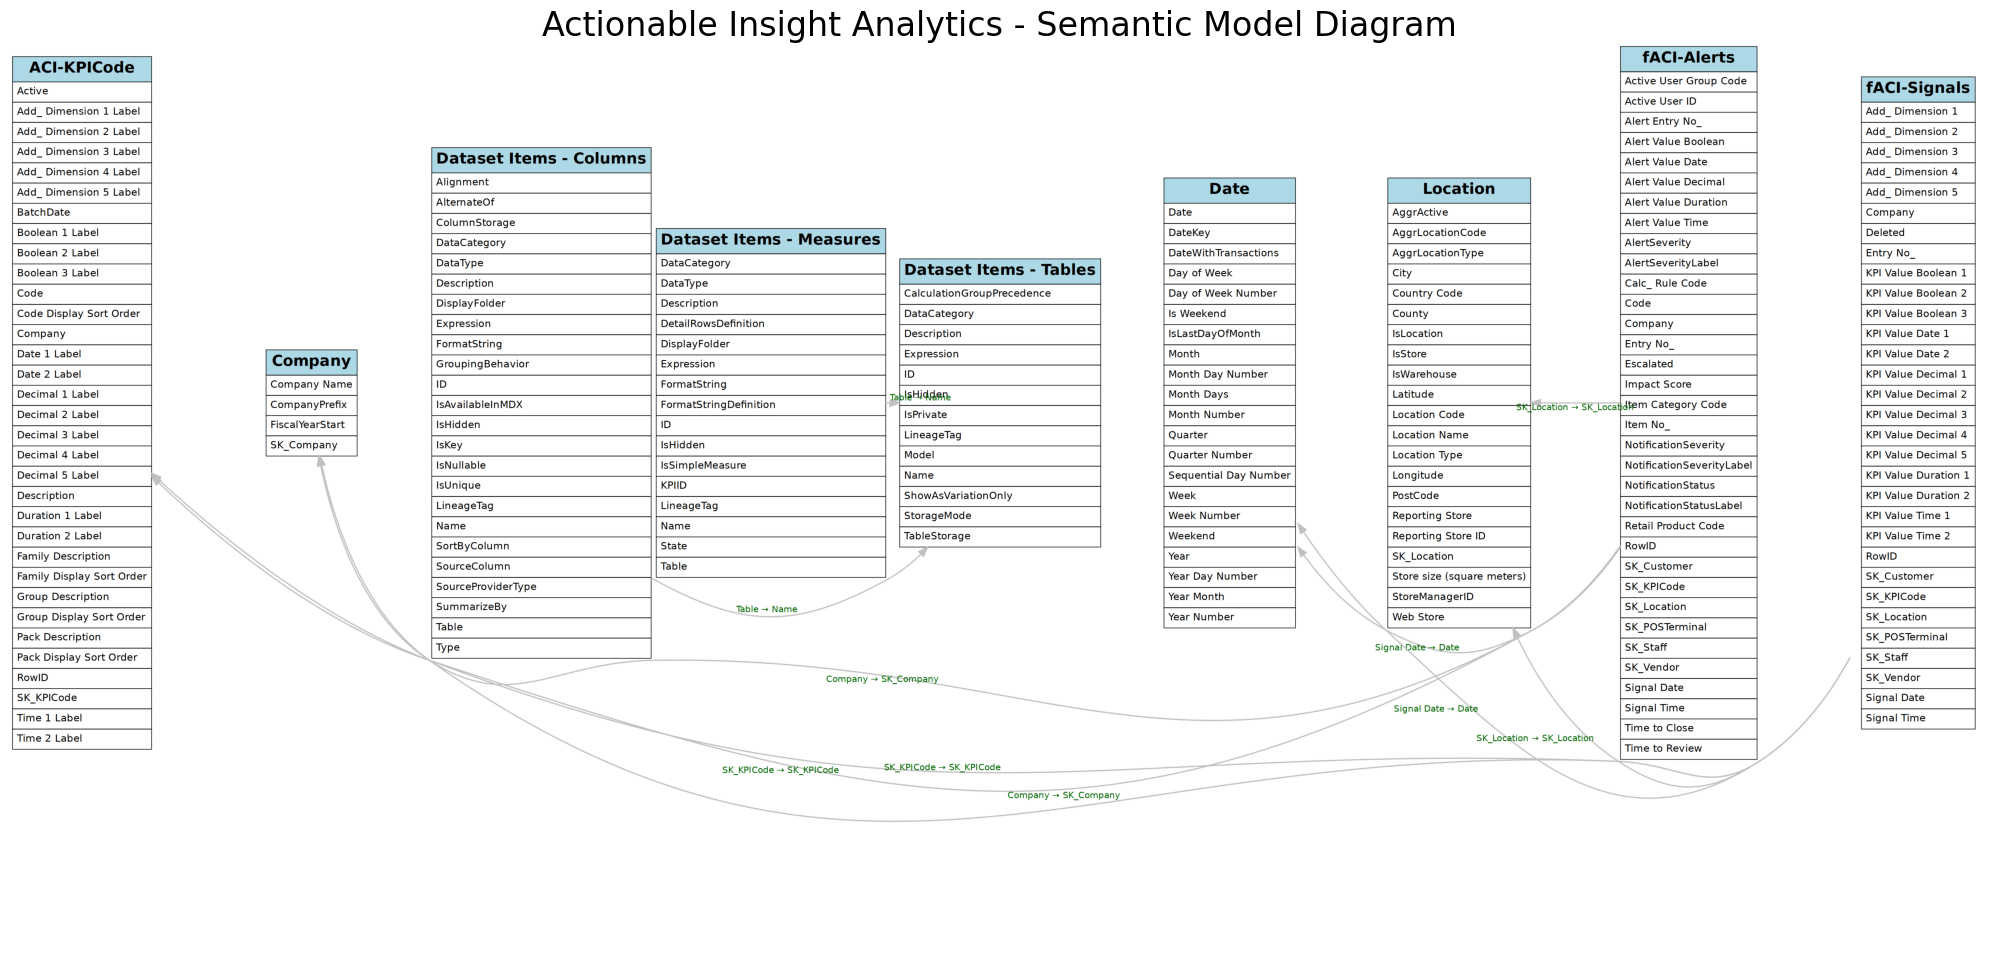

✅ Image saved: /mnt/var/hadoop/tmp/nm-secondary-local-dir/usercache/trusted-service-user/appcache/application_1750770701655_0001/container_1750770701655_0001_01_000001/relationship_graph_horizontal_manual.png


In [34]:

# Step 1: Get relationships
relationships = fabric.list_relationships("Actionable Insight Analytics")

# Step 2: Get all tables involved
all_tables = sorted(set(relationships['From Table']).union(set(relationships['To Table'])))

# Step 3: Get all columns per table
tables = {}
for table in all_tables:
    try:
        cols = fabric.list_columns("Actionable Insight Analytics", table)
        tables[table] = sorted(cols['Column Name'])
    except Exception as e:
        print(f"⚠️ Could not list columns for '{table}': {e}")
        tables[table] = []

# Step 4: Create graph with 'neato' engine for manual positioning
dot = graphviz.Digraph(format='png', engine='neato')

dot.attr(
    dpi='150',
    overlap='false',
    splines='true',
    fontsize='20',
    fontname='Calibri'
)
dot.attr('edge', fontname='Calibri', fontsize='16', color='gray')

# Helper to create HTML label for each table node with bigger fonts
def make_html_label(table, columns):
    label = f"""<
    <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="6">
        <TR><TD BGCOLOR="lightblue" ALIGN="CENTER"><B><FONT POINT-SIZE="24">{html.escape(table)}</FONT></B></TD></TR>
    """
    for col in columns:
        label += f'<TR><TD ALIGN="LEFT"><FONT POINT-SIZE="16">{html.escape(col)}</FONT></TD></TR>\n'
    label += "</TABLE>\n>"
    return label

# Step 5: Manually position tables spaced horizontally
x_spacing = 300  # increase for wider spacing
y_pos = 0        # all tables aligned vertically

for i, table in enumerate(all_tables):
    x = i * x_spacing
    label = make_html_label(table, tables.get(table, []))
    dot.node(
        table,
        label=label,
        shape='plaintext',
        pos=f"{x},{y_pos}!",
        width='3',
        height='2',
        margin='0',
    )

# Step 6: Add edges between tables (simple table-to-table arrows)
for _, row in relationships.iterrows():
    from_table = row['From Table']
    to_table = row['To Table']
    dot.edge(
        from_table, to_table,
        label=f"{row['From Column']} → {row['To Column']}",
        fontsize='14',
        fontcolor='darkgreen',
        penwidth='2',
        arrowsize='1.5'
    )

# Step 7: Render and save
output_file = "relationship_graph_horizontal_manual"
rendered_path = dot.render(output_file, cleanup=True)

# Step 8: Display image
img = Image.open(rendered_path)
plt.figure(figsize=(40, 12))  # wide figure for horizontal layout
plt.imshow(img)
plt.axis('off')
plt.title("Actionable Insight Analytics - Semantic Model Diagram", fontsize=24)
plt.show()

print(f"✅ Image saved: {os.path.abspath(rendered_path)}")

StatementMeta(, 65cf87bb-c507-4039-8247-31ede8a0788e, 63, Finished, Available, Finished)

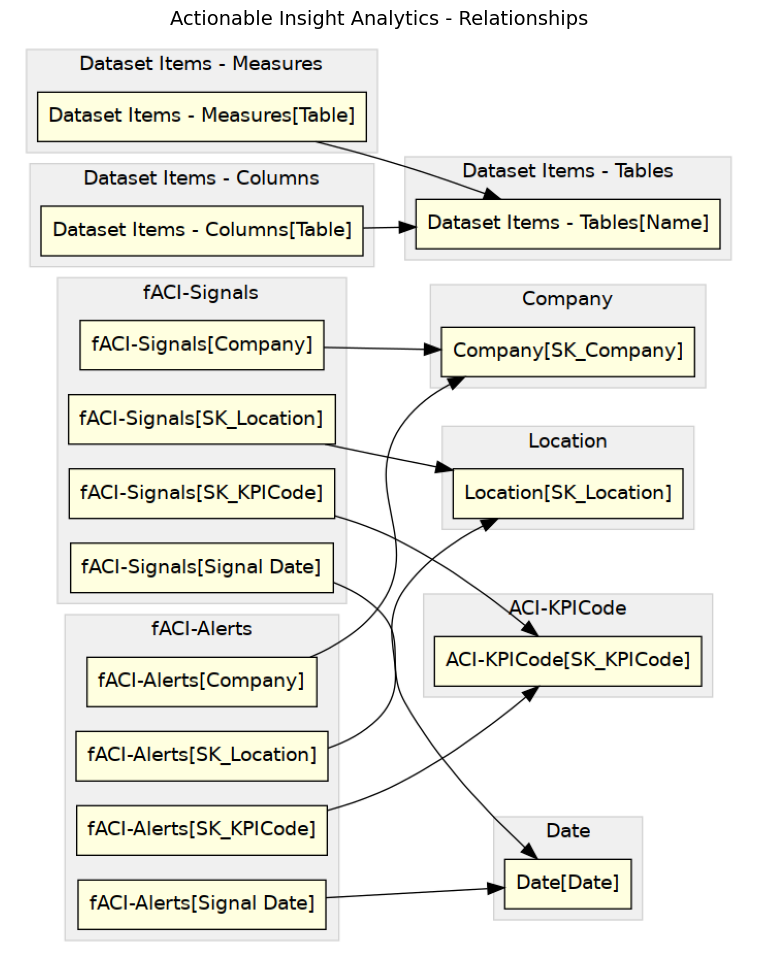

In [61]:
# Step 1: Get relationships from Fabric model
relationships = fabric.list_relationships("Actionable Insight Analytics")

# Step 2: Create the main directed graph
dot = graphviz.Digraph(format='png')
dot.attr(rankdir='LR')  # Horizontal layout
dot.attr('node', shape='box', style='filled', fillcolor='lightyellow', fontname='Calibri')
dot.attr('graph', fontname='Calibri')
dot.attr('edge', fontname='Calibri')

# Step 3: Organize columns by table
tables = {}

for _, row in relationships.iterrows():
    from_table = row['From Table']
    from_col = row['From Column']
    to_table = row['To Table']
    to_col = row['To Column']

    tables.setdefault(from_table, set()).add(from_col)
    tables.setdefault(to_table, set()).add(to_col)

# Step 4: Create a subgraph (cluster) for each table
for table, columns in tables.items():
    with dot.subgraph(name=f"cluster_{table}") as sub:
        sub.attr(label=table, style='filled', color='lightgrey', fillcolor='#F0F0F0')
        for col in columns:
            node_name = f"{table}[{col}]"
            sub.node(node_name)

# Step 5: Add edges (relationships)
for _, row in relationships.iterrows():
    from_node = f"{row['From Table']}[{row['From Column']}]"
    to_node = f"{row['To Table']}[{row['To Column']}]"
    dot.edge(from_node, to_node, arrowhead='normal', arrowsize='1.2')

# Step 6: Render to file
output_file = "relationship_graph_grouped"
dot.render(output_file, cleanup=True)

# Step 7: Display the image
img = Image.open(output_file + '.png')
plt.figure(figsize=(12, 12))
plt.imshow(img)
plt.axis('off')
plt.title("Actionable Insight Analytics - Relationships", fontsize=14)
plt.show()

# **Sales Analytics**

StatementMeta(, 65cf87bb-c507-4039-8247-31ede8a0788e, 56, Finished, Available, Finished)

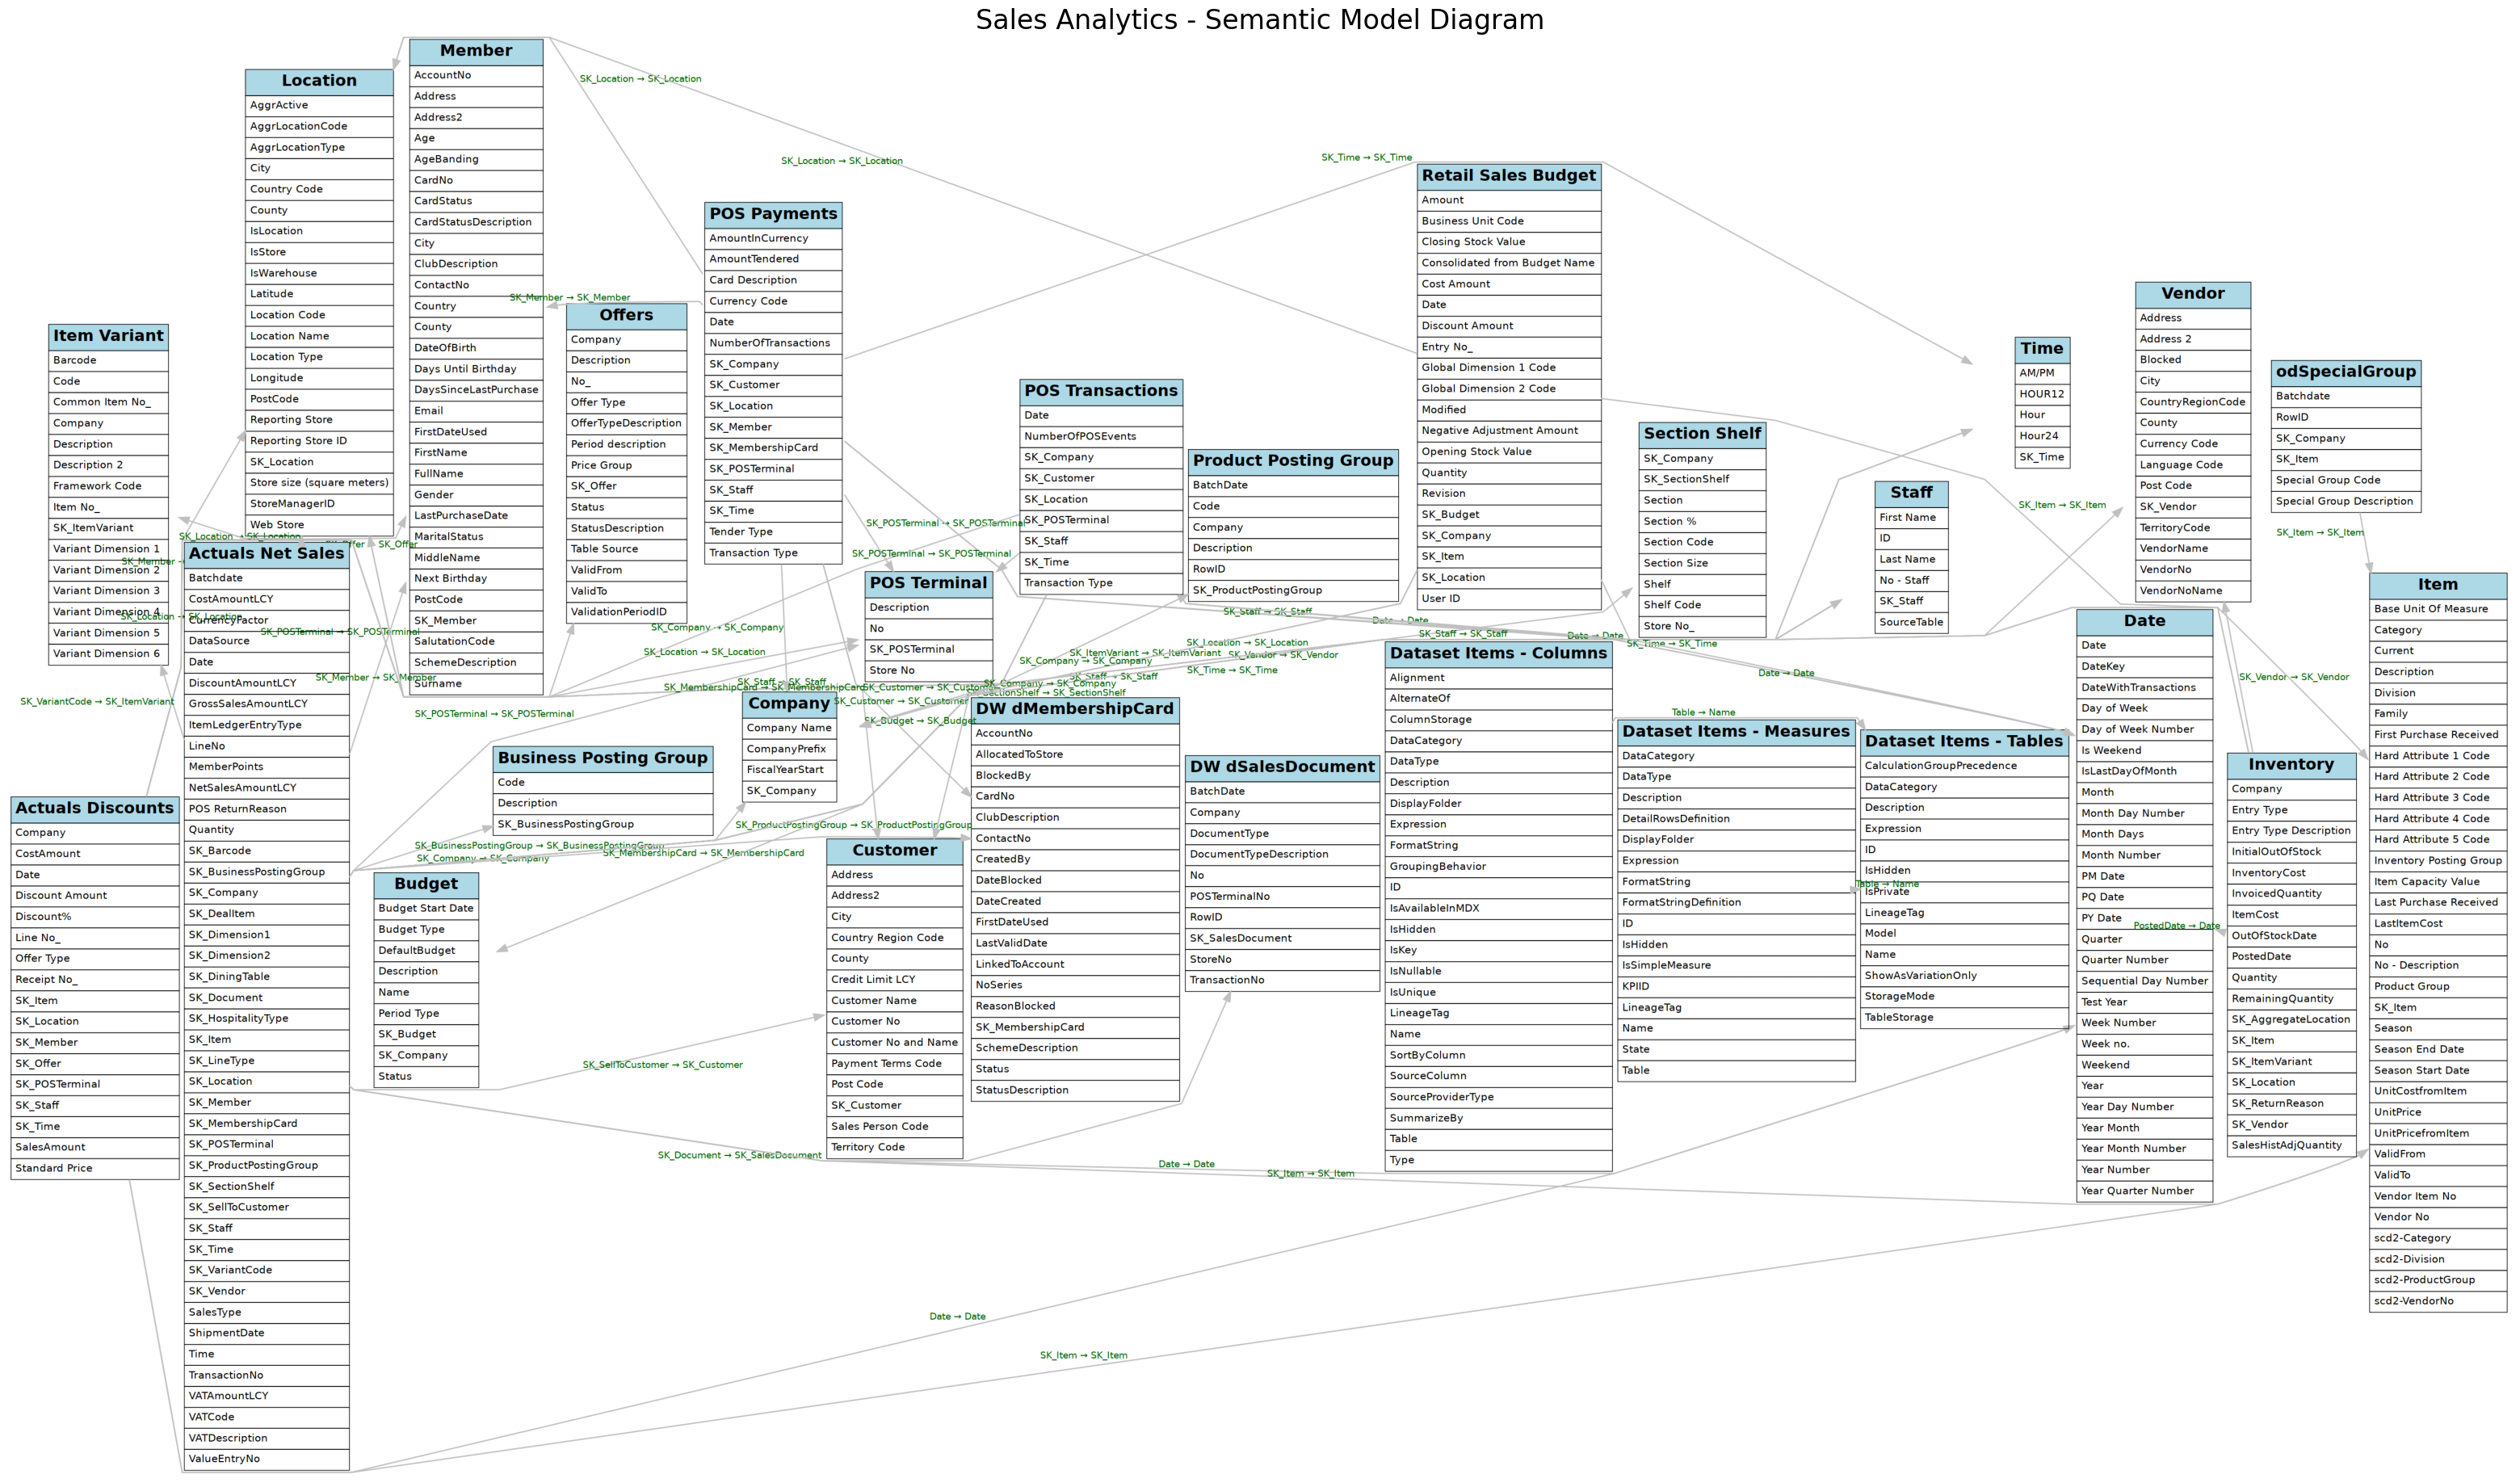

✅ Image saved: /mnt/var/hadoop/tmp/nm-secondary-local-dir/usercache/trusted-service-user/appcache/application_1750770701655_0001/container_1750770701655_0001_01_000001/relationship_graph_horizontal_manual.png


In [54]:

# Step 1: Get relationships
relationships = fabric.list_relationships("Sales Analytics")

# Step 2: Get all tables involved
all_tables = sorted(set(relationships['From Table']).union(set(relationships['To Table'])))

# Step 3: Get all columns per table
tables = {}
for table in all_tables:
    try:
        cols = fabric.list_columns("Sales Analytics", table)
        tables[table] = sorted(cols['Column Name'])
    except Exception as e:
        print(f"⚠️ Could not list columns for '{table}': {e}")
        tables[table] = []

# Step 4: Create graph with 'neato' engine for manual positioning
dot = graphviz.Digraph(format='png', engine='neato')

dot.attr(
    dpi='96',
    overlap='false',
    splines='polyline',  # Use polyline for straighter edges
    fontsize='20',
    fontname='Calibri'
)
dot.attr('edge', fontname='Calibri', fontsize='14', color='gray')

# Helper to create HTML label for each table node with bigger fonts
def make_html_label(table, columns):
    label = f"""<
    <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="6">
        <TR><TD BGCOLOR="lightblue" ALIGN="CENTER"><B><FONT POINT-SIZE="24">{html.escape(table)}</FONT></B></TD></TR>
    """
    for col in columns:
        label += f'<TR><TD ALIGN="LEFT"><FONT POINT-SIZE="16">{html.escape(col)}</FONT></TD></TR>\n'
    label += "</TABLE>\n>"
    return label

# Step 5: Manually position tables spaced horizontally in 2 rows
x_spacing = 300  # increase for wider spacing
y_spacing = 300  # increase for vertical spacing

num_tables = len(all_tables)
num_rows = 2
tables_per_row = (num_tables + num_rows - 1) // num_rows

for i, table in enumerate(all_tables):
    row = i // tables_per_row
    col = i % tables_per_row
    x = col * x_spacing
    y = row * y_spacing
    label = make_html_label(table, tables.get(table, []))
    dot.node(
        table,
        label=label,
        shape='plaintext',
        pos=f"{x},{y}!",
        width='3',
        height='2',
        margin='0',
    )

# Step 6: Add edges between tables (simple table-to-table arrows)
for _, row in relationships.iterrows():
    from_table = row['From Table']
    to_table = row['To Table']
    dot.edge(
        from_table, to_table,
        label=f"{row['From Column']} → {row['To Column']}",
        fontsize='14',
        fontcolor='darkgreen',
        penwidth='2',
        arrowsize='1.5',
        constraint='false'  # Allow more flexible edge placement
    )

# Step 7: Render and save
output_file = "relationship_graph_horizontal_manual"
rendered_path = dot.render(output_file, cleanup=True)

# Step 8: Display image
img = Image.open(rendered_path)
plt.figure(figsize=(40, 24))  # Increase figure size for larger image and two rows layout
plt.imshow(img)
plt.axis('off')
plt.title("Sales Analytics - Semantic Model Diagram", fontsize=24)
plt.show()

print(f"✅ Image saved: {os.path.abspath(rendered_path)}")


StatementMeta(, 65cf87bb-c507-4039-8247-31ede8a0788e, 64, Finished, Available, Finished)

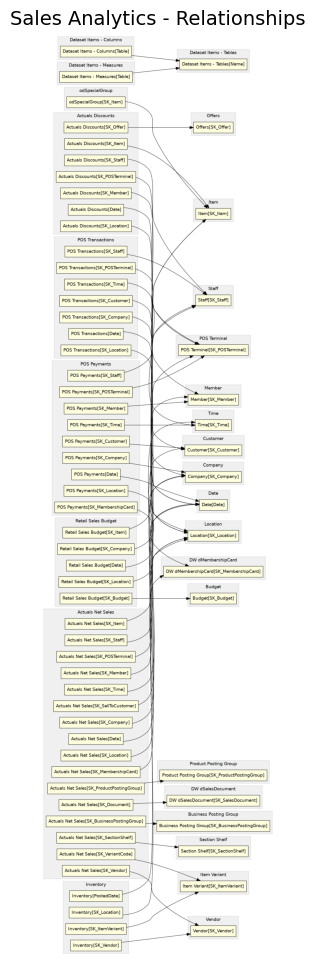

In [62]:
# Step 1: Get relationships from Fabric model
relationships = fabric.list_relationships("Sales Analytics")

# Step 2: Create the main directed graph
dot = graphviz.Digraph(format='png')
dot.attr(rankdir='LR')  # Horizontal layout
dot.attr('node', shape='box', style='filled', fillcolor='lightyellow', fontname='Calibri')
dot.attr('graph', fontname='Calibri')
dot.attr('edge', fontname='Calibri')

# Step 3: Organize columns by table
tables = {}

for _, row in relationships.iterrows():
    from_table = row['From Table']
    from_col = row['From Column']
    to_table = row['To Table']
    to_col = row['To Column']

    tables.setdefault(from_table, set()).add(from_col)
    tables.setdefault(to_table, set()).add(to_col)

# Step 4: Create a subgraph (cluster) for each table
for table, columns in tables.items():
    with dot.subgraph(name=f"cluster_{table}") as sub:
        sub.attr(label=table, style='filled', color='lightgrey', fillcolor='#F0F0F0')
        for col in columns:
            node_name = f"{table}[{col}]"
            sub.node(node_name)

# Step 5: Add edges (relationships)
for _, row in relationships.iterrows():
    from_node = f"{row['From Table']}[{row['From Column']}]"
    to_node = f"{row['To Table']}[{row['To Column']}]"
    dot.edge(from_node, to_node, arrowhead='normal', arrowsize='1.2')

# Step 6: Render to file
output_file = "relationship_graph_grouped"
dot.render(output_file, cleanup=True)

# Step 7: Display the image
img = Image.open(output_file + '.png')
plt.figure(figsize=(12, 12))
plt.imshow(img)
plt.axis('off')
plt.title("Sales Analytics - Relationships", fontsize=14)
plt.show()

# **Supply Chain Analytics**

StatementMeta(, 65cf87bb-c507-4039-8247-31ede8a0788e, 57, Finished, Available, Finished)

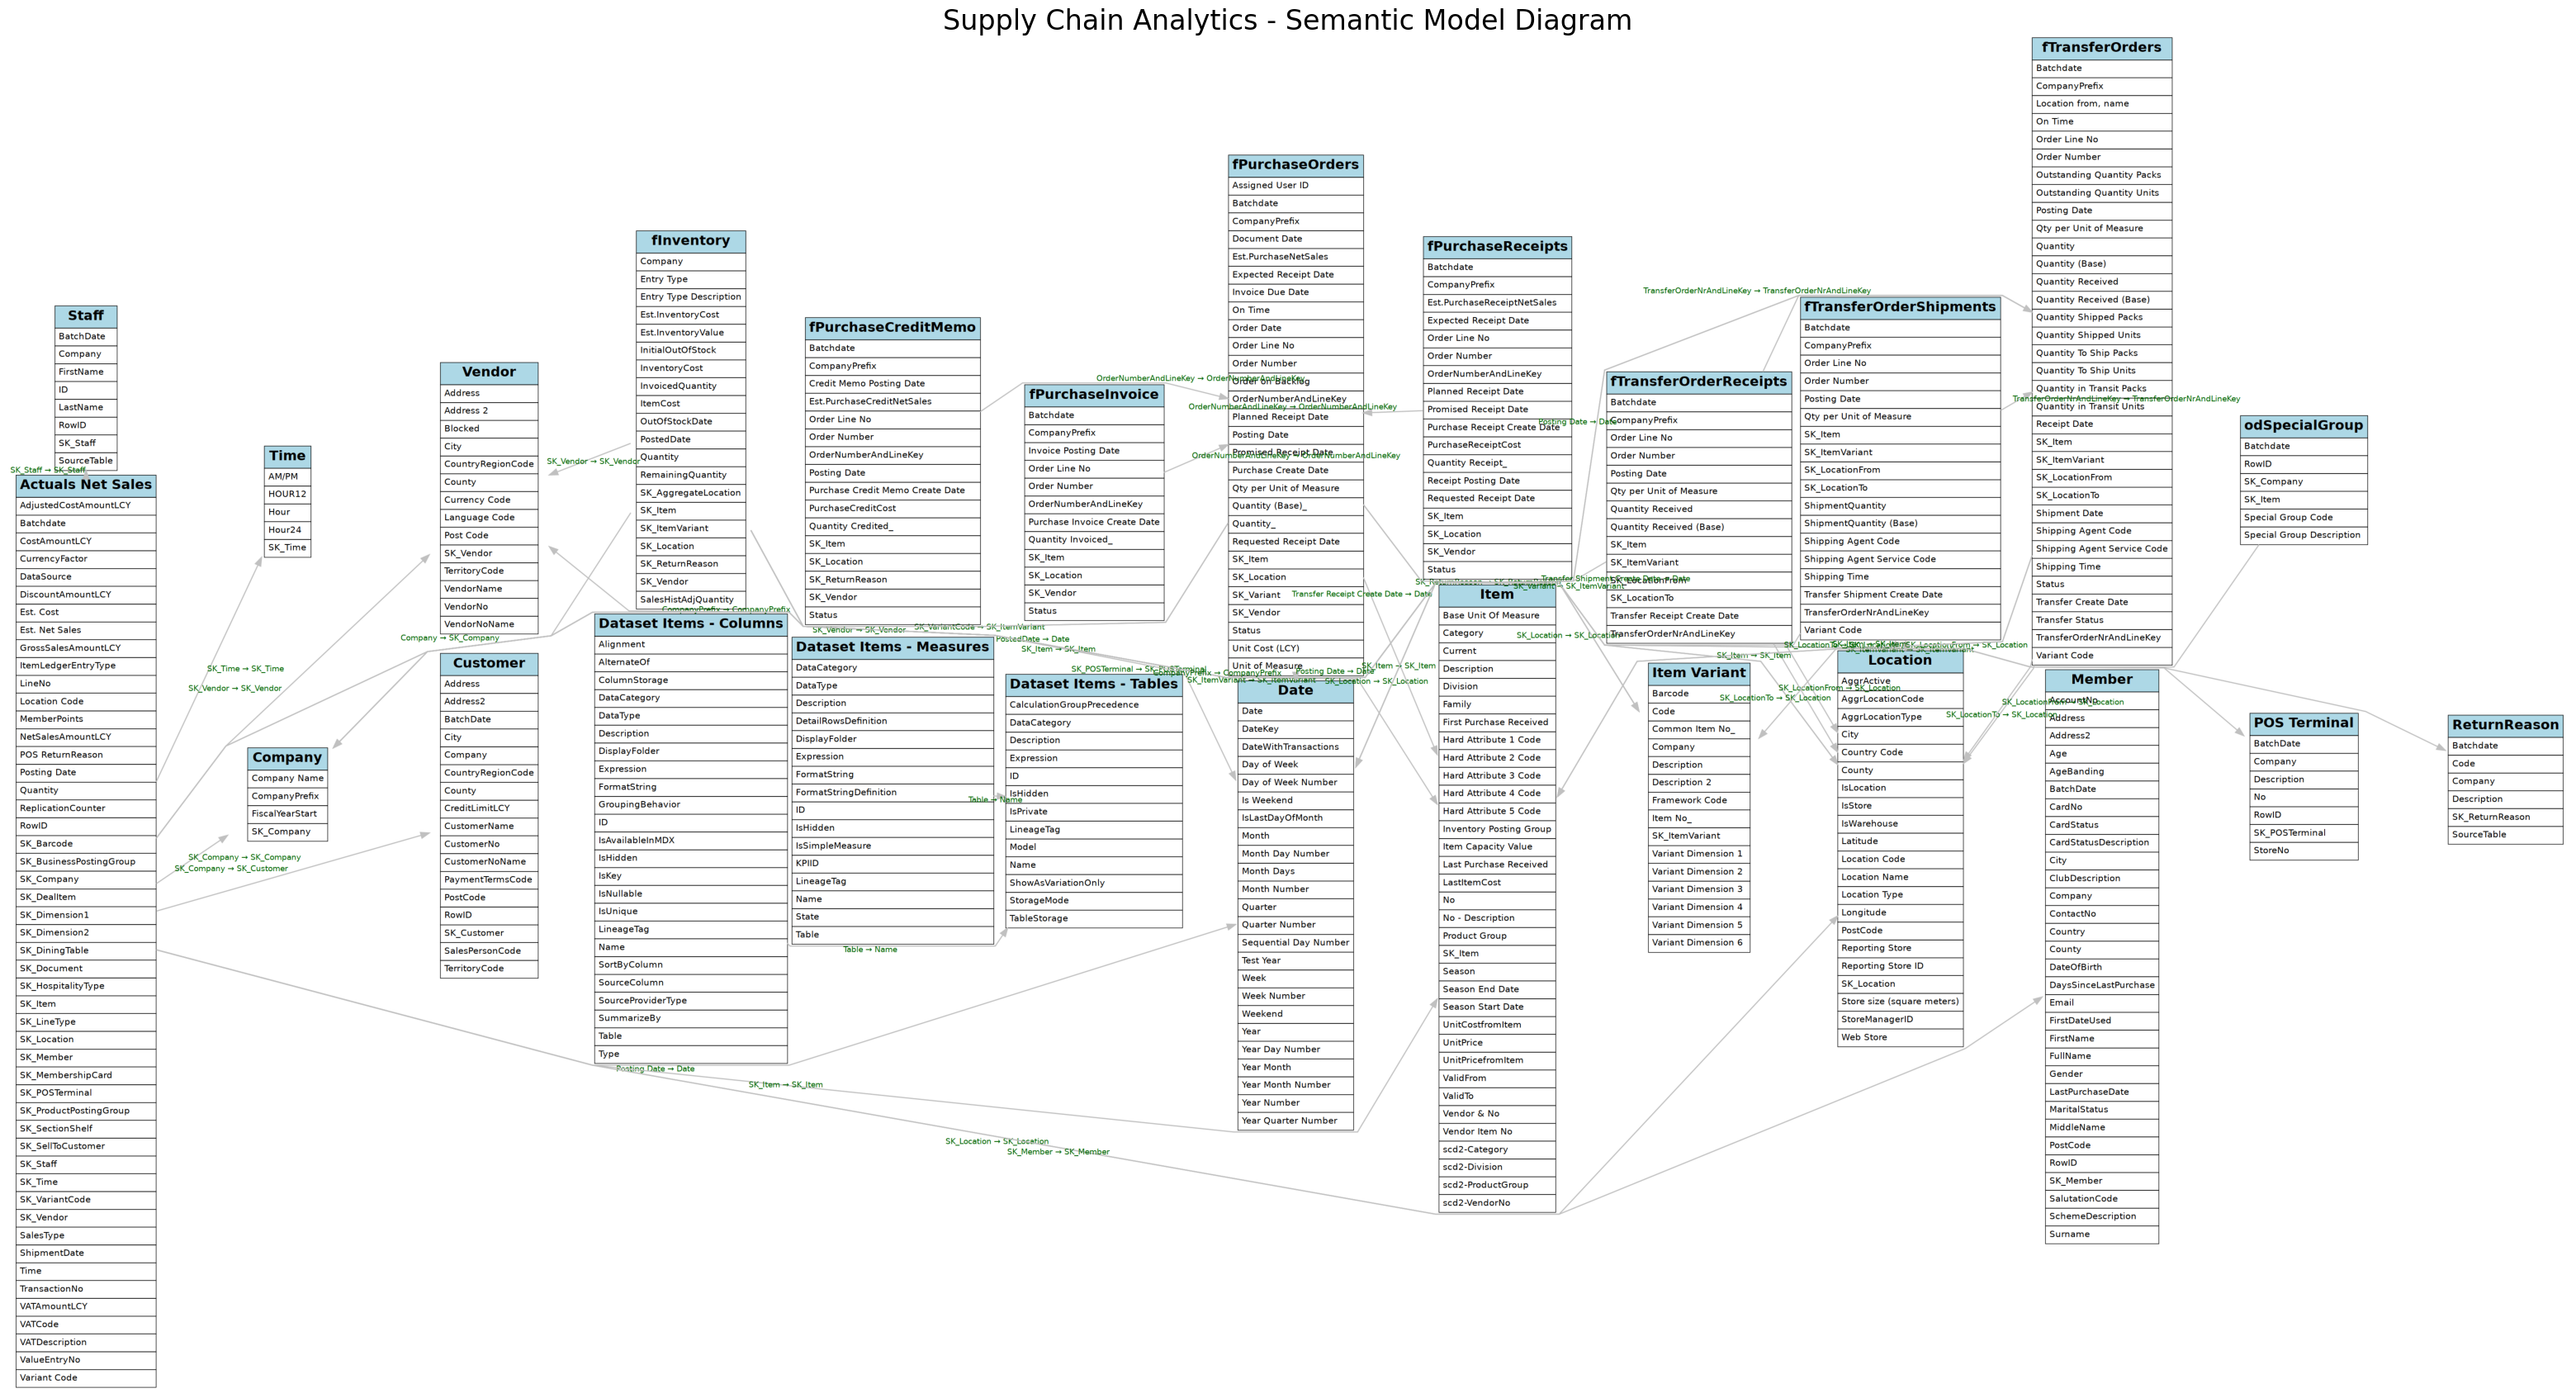

✅ Image saved: /mnt/var/hadoop/tmp/nm-secondary-local-dir/usercache/trusted-service-user/appcache/application_1750770701655_0001/container_1750770701655_0001_01_000001/relationship_graph_horizontal_manual.png


In [55]:
# Step 1: Get relationships
relationships = fabric.list_relationships("Supply Chain Analytics")

# Step 2: Get all tables involved
all_tables = sorted(set(relationships['From Table']).union(set(relationships['To Table'])))

# Step 3: Get all columns per table
tables = {}
for table in all_tables:
    try:
        cols = fabric.list_columns("Supply Chain Analytics", table)
        tables[table] = sorted(cols['Column Name'])
    except Exception as e:
        print(f"⚠️ Could not list columns for '{table}': {e}")
        tables[table] = []

# Step 4: Create graph with 'neato' engine for manual positioning
dot = graphviz.Digraph(format='png', engine='neato')

dot.attr(
    dpi='96',
    overlap='false',
    splines='polyline',  # Use polyline for straighter edges
    fontsize='20',
    fontname='Calibri'
)
dot.attr('edge', fontname='Calibri', fontsize='14', color='gray')

# Helper to create HTML label for each table node with bigger fonts
def make_html_label(table, columns):
    label = f"""<
    <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="6">
        <TR><TD BGCOLOR="lightblue" ALIGN="CENTER"><B><FONT POINT-SIZE="24">{html.escape(table)}</FONT></B></TD></TR>
    """
    for col in columns:
        label += f'<TR><TD ALIGN="LEFT"><FONT POINT-SIZE="16">{html.escape(col)}</FONT></TD></TR>\n'
    label += "</TABLE>\n>"
    return label

# Step 5: Manually position tables spaced horizontally in 2 rows
x_spacing = 300  # increase for wider spacing
y_spacing = 300  # increase for vertical spacing

num_tables = len(all_tables)
num_rows = 2
tables_per_row = (num_tables + num_rows - 1) // num_rows

for i, table in enumerate(all_tables):
    row = i // tables_per_row
    col = i % tables_per_row
    x = col * x_spacing
    y = row * y_spacing
    label = make_html_label(table, tables.get(table, []))
    dot.node(
        table,
        label=label,
        shape='plaintext',
        pos=f"{x},{y}!",
        width='3',
        height='2',
        margin='0',
    )

# Step 6: Add edges between tables (simple table-to-table arrows)
for _, row in relationships.iterrows():
    from_table = row['From Table']
    to_table = row['To Table']
    dot.edge(
        from_table, to_table,
        label=f"{row['From Column']} → {row['To Column']}",
        fontsize='14',
        fontcolor='darkgreen',
        penwidth='2',
        arrowsize='1.5',
        constraint='false'  # Allow more flexible edge placement
    )

# Step 7: Render and save
output_file = "relationship_graph_horizontal_manual"
rendered_path = dot.render(output_file, cleanup=True)

# Step 8: Display image
img = Image.open(rendered_path)
plt.figure(figsize=(40, 24))  # Increase figure size for larger image and two rows layout
plt.imshow(img)
plt.axis('off')
plt.title("Supply Chain Analytics - Semantic Model Diagram", fontsize=24)
plt.show()

print(f"✅ Image saved: {os.path.abspath(rendered_path)}")

StatementMeta(, 65cf87bb-c507-4039-8247-31ede8a0788e, 65, Finished, Available, Finished)

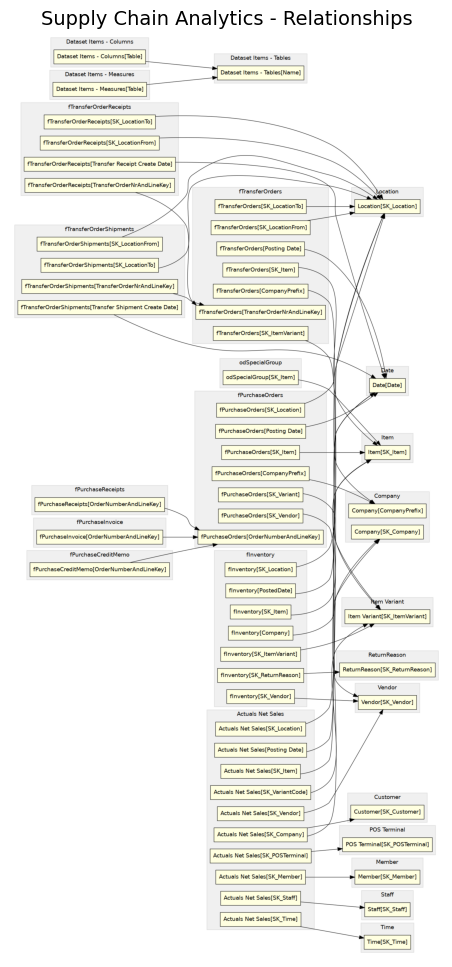

In [63]:
# Step 1: Get relationships from Fabric model
relationships = fabric.list_relationships("Supply Chain Analytics")

# Step 2: Create the main directed graph
dot = graphviz.Digraph(format='png')
dot.attr(rankdir='LR')  # Horizontal layout
dot.attr('node', shape='box', style='filled', fillcolor='lightyellow', fontname='Calibri')
dot.attr('graph', fontname='Calibri')
dot.attr('edge', fontname='Calibri')

# Step 3: Organize columns by table
tables = {}

for _, row in relationships.iterrows():
    from_table = row['From Table']
    from_col = row['From Column']
    to_table = row['To Table']
    to_col = row['To Column']

    tables.setdefault(from_table, set()).add(from_col)
    tables.setdefault(to_table, set()).add(to_col)

# Step 4: Create a subgraph (cluster) for each table
for table, columns in tables.items():
    with dot.subgraph(name=f"cluster_{table}") as sub:
        sub.attr(label=table, style='filled', color='lightgrey', fillcolor='#F0F0F0')
        for col in columns:
            node_name = f"{table}[{col}]"
            sub.node(node_name)

# Step 5: Add edges (relationships)
for _, row in relationships.iterrows():
    from_node = f"{row['From Table']}[{row['From Column']}]"
    to_node = f"{row['To Table']}[{row['To Column']}]"
    dot.edge(from_node, to_node, arrowhead='normal', arrowsize='1.2')

# Step 6: Render to file
output_file = "relationship_graph_grouped"
dot.render(output_file, cleanup=True)

# Step 7: Display the image
img = Image.open(output_file + '.png')
plt.figure(figsize=(12, 12))
plt.imshow(img)
plt.axis('off')
plt.title("Supply Chain Analytics - Relationships", fontsize=14)
plt.show()